In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path = 'Hedge_Fund/data/'
data = path + 'PS_2_Performance_Measurement (2).xlsx'

In [295]:
factors = pd.read_excel(data,sheet_name='factors',parse_dates=['date'],index_col='date')
factors

,RF,Mkt-RF,SMB,HML,UMD
date,,,,,
1994-01-31,0.0025,0.0290,0.0011,0.0215,0.0009
1994-02-28,0.0021,-0.0263,0.0272,-0.0137,-0.0027
1994-03-31,0.0027,-0.0485,-0.0090,0.0129,-0.0131
1994-04-29,0.0027,0.0068,-0.0088,0.0166,0.0039
1994-05-31,0.0032,0.0062,-0.0205,0.0012,-0.0222
...,...,...,...,...,...
2012-02-29,0.0000,0.0420,-0.0160,-0.0003,-0.0027
2012-03-30,0.0000,0.0252,-0.0019,0.0002,0.0149
2012-04-30,0.0000,-0.0069,-0.0058,-0.0019,0.0394


In [296]:
rets = pd.read_excel(data,sheet_name='total_returns',parse_dates=['date'],index_col='date')
rets

,Ln/Sh Eq Hedge Fund USD,Eq Mkt Ntr Hedge Fund USD,Ded Sh Bs Hedge Fund USD,Global Mac Hedge Fund USD,Mngd Fut Hedge Fund USD,Emg Mkts Hedge Fund USD,Evnt Drvn Hedge Fund USD,Cnvrt Arb Hedge Fund USD,Fx Inc Arb Hedge Fund USD,DJCS Hedge Fund USD
date,,,,,,,,,,
1994-01-31,0.011733,-0.005467,-0.016267,0.001433,0.001933,0.105133,0.036533,0.003333,0.012733,0.011133
1994-02-28,-0.025011,0.002106,0.019713,-0.056811,0.011667,-0.011705,-0.001850,0.001188,-0.020346,-0.041240
1994-03-31,-0.039114,-0.002514,0.071827,-0.042854,0.025923,-0.046227,-0.013051,-0.009758,-0.016930,-0.035777
1994-04-29,-0.015720,0.002397,0.012710,-0.016033,0.008437,-0.083673,-0.006673,-0.025332,-0.002165,-0.017542
1994-05-31,0.005550,-0.001229,0.022357,0.037839,0.007497,-0.007453,-0.001604,-0.010329,0.007780,0.022178
...,...,...,...,...,...,...,...,...,...,...
2012-02-29,0.026418,0.013335,-0.046567,0.007852,0.012039,0.029177,0.015809,0.018784,0.010017,0.016091
2012-03-30,0.004998,-0.001553,-0.013541,-0.004271,-0.029648,-0.007012,0.007863,0.005535,0.007377,0.000478
2012-04-30,-0.004680,-0.004139,-0.025323,-0.002522,0.004299,0.001492,-0.002299,-0.002381,0.006870,-0.000423


In [297]:
nrets = rets.drop(['DJCS Hedge Fund USD'],axis=1)
nrets

,Ln/Sh Eq Hedge Fund USD,Eq Mkt Ntr Hedge Fund USD,Ded Sh Bs Hedge Fund USD,Global Mac Hedge Fund USD,Mngd Fut Hedge Fund USD,Emg Mkts Hedge Fund USD,Evnt Drvn Hedge Fund USD,Cnvrt Arb Hedge Fund USD,Fx Inc Arb Hedge Fund USD
date,,,,,,,,,
1994-01-31,0.011733,-0.005467,-0.016267,0.001433,0.001933,0.105133,0.036533,0.003333,0.012733
1994-02-28,-0.025011,0.002106,0.019713,-0.056811,0.011667,-0.011705,-0.001850,0.001188,-0.020346
1994-03-31,-0.039114,-0.002514,0.071827,-0.042854,0.025923,-0.046227,-0.013051,-0.009758,-0.016930
1994-04-29,-0.015720,0.002397,0.012710,-0.016033,0.008437,-0.083673,-0.006673,-0.025332,-0.002165
1994-05-31,0.005550,-0.001229,0.022357,0.037839,0.007497,-0.007453,-0.001604,-0.010329,0.007780
...,...,...,...,...,...,...,...,...,...
2012-02-29,0.026418,0.013335,-0.046567,0.007852,0.012039,0.029177,0.015809,0.018784,0.010017
2012-03-30,0.004998,-0.001553,-0.013541,-0.004271,-0.029648,-0.007012,0.007863,0.005535,0.007377
2012-04-30,-0.004680,-0.004139,-0.025323,-0.002522,0.004299,0.001492,-0.002299,-0.002381,0.006870


In [298]:
xrets = nrets.sub(factors['RF'],axis=0)
xrets

,Ln/Sh Eq Hedge Fund USD,Eq Mkt Ntr Hedge Fund USD,Ded Sh Bs Hedge Fund USD,Global Mac Hedge Fund USD,Mngd Fut Hedge Fund USD,Emg Mkts Hedge Fund USD,Evnt Drvn Hedge Fund USD,Cnvrt Arb Hedge Fund USD,Fx Inc Arb Hedge Fund USD
date,,,,,,,,,
1994-01-31,0.009233,-0.007967,-0.018767,-0.001067,-0.000567,0.102633,0.034033,0.000833,0.010233
1994-02-28,-0.027111,0.000006,0.017613,-0.058911,0.009567,-0.013805,-0.003950,-0.000912,-0.022446
1994-03-31,-0.041814,-0.005214,0.069127,-0.045554,0.023223,-0.048927,-0.015751,-0.012458,-0.019630
1994-04-29,-0.018420,-0.000303,0.010010,-0.018733,0.005737,-0.086373,-0.009373,-0.028032,-0.004865
1994-05-31,0.002350,-0.004429,0.019157,0.034639,0.004297,-0.010653,-0.004804,-0.013529,0.004580
...,...,...,...,...,...,...,...,...,...
2012-02-29,0.026418,0.013335,-0.046567,0.007852,0.012039,0.029177,0.015809,0.018784,0.010017
2012-03-30,0.004998,-0.001553,-0.013541,-0.004271,-0.029648,-0.007012,0.007863,0.005535,0.007377
2012-04-30,-0.004680,-0.004139,-0.025323,-0.002522,0.004299,0.001492,-0.002299,-0.002381,0.006870


In [299]:
portfolio = (xrets/9).sum(axis=1)
portfolio

date
1994-01-31    0.014289
1994-02-28   -0.011105
1994-03-31   -0.010778
1994-04-29   -0.016705
1994-05-31    0.003512
                ...   
2012-02-29    0.009652
2012-03-30   -0.003361
2012-04-30   -0.003187
2012-05-31   -0.002115
2012-06-29   -0.006246
Length: 222, dtype: float64

In [327]:
mask1 = portfolio.index<='2003-12-31' 
mask1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False,

In [328]:
mask2 = (portfolio.index>'2004')
mask2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,

In [338]:
early_sample = portfolio[mask1]
early_sample

date
1994-01-31    0.014289
1994-02-28   -0.011105
1994-03-31   -0.010778
1994-04-29   -0.016705
1994-05-31    0.003512
                ...   
2003-08-29    0.004994
2003-09-30    0.011247
2003-10-31    0.001880
2003-11-28    0.005253
2003-12-31    0.013809
Length: 120, dtype: float64

In [339]:
late_sample = portfolio[mask2]
late_sample

date
2004-01-30    0.011441
2004-02-27    0.015420
2004-03-31   -0.001106
2004-04-30   -0.006204
2004-05-31   -0.003819
                ...   
2012-02-29    0.009652
2012-03-30   -0.003361
2012-04-30   -0.003187
2012-05-31   -0.002115
2012-06-29   -0.006246
Length: 102, dtype: float64

In [340]:
sr1 = (early_sample.mean(axis=0)*12) / (early_sample.std()*np.sqrt(12))
sr1

1.0683022022858932

In [341]:
sr2 = (late_sample.mean(axis=0)*12) / (late_sample.std()*np.sqrt(12))
sr2

0.4691122320766101

In [342]:
sr3 = (portfolio.mean(axis=0)*12) / (portfolio.std()*np.sqrt(12))
sr3

0.7661663352339297

In [343]:
res = pd.DataFrame(data=[sr1,sr2,sr3],index=['sr1','sr2','sr3'])
res.columns=['']
res.T

,sr1,sr2,sr3
,1.068302,0.469112,0.766166


In [344]:
early_sample.mean(axis=0)*12

0.04475871244707044

In [357]:
def obj_fun(input):
    x1 = input[0]
    x2 = input[1]
    x3 = input[2]
    x4 = input[3]
    x5 = input[4]
    x6 = input[5]
    x7 = input[6]
    x8 = input[7]
    x9 = input[8]
    mask = mask1
    mean = ([x1,x2,x3,x4,x5,x6,x7,x8,x9]*xrets[mask]).sum(axis=1).mean()*12
    std = ([x1,x2,x3,x4,x5,x6,x7,x8,x9]*xrets[mask]).sum(axis=1).std()*np.sqrt(12)
    result = -mean / std
    return result

In [358]:
x0=np.repeat(1/9,9)
obj_fun(x0)

-1.0683022022858935

In [359]:
def con1(input):
    x1 = input[0]
    x2 = input[1]
    x3 = input[2]
    x4 = input[3]
    x5 = input[4]
    x6 = input[5]
    x7 = input[6]
    x8 = input[7]
    x9 = input[8]
    result = x1+x2+x3+x4+x5+x6+x7+x8+x9 - 1
    return result

In [360]:
b = (0,1)
boundaries = (b, b, b, b,b,b,b,b,b)

In [361]:
from scipy.optimize import minimize

In [362]:
con = {'type':'eq','fun':con1}
solution = minimize(obj_fun,x0,method='SLSQP',bounds=boundaries,constraints=con)
solution

     fun: -2.255036055180547
     jac: array([ 1.31234527e-03, -3.61710787e-04,  1.42556429e-03, -4.39107418e-04,
        2.47208476e-01,  2.81538412e+00,  1.03572011e-03, -1.18136406e-04,
        4.42593992e-02])
 message: 'Optimization terminated successfully'
    nfev: 108
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([4.01264061e-02, 6.69843859e-01, 7.19438277e-02, 5.69958701e-03,
       3.64256309e-15, 1.73380846e-14, 9.94947429e-02, 1.12891577e-01,
       5.74602447e-15])

In [363]:
def find_sr(x):
    mean = x.mean()*12
    std = x.std() * np.sqrt(12)
    sr = mean/std
    return sr

In [375]:
x = (solution.x*xrets[mask2]).sum(axis=1)
x

date
2004-01-30    0.008132
2004-02-27    0.006911
2004-03-31   -0.002484
2004-04-30    0.000380
2004-05-31   -0.000313
                ...   
2012-02-29    0.010380
2012-03-30   -0.000431
2012-04-30   -0.005294
2012-05-31   -0.018977
2012-06-29    0.004485
Length: 102, dtype: float64

In [376]:
y = (solution.x*xrets[mask1]).sum(axis=1)

In [377]:
z = (solution.x*xrets).sum(axis=1)

In [378]:
find_sr(x)
find_sr(y)
find_sr(z)

0.34077659929351933

In [379]:
res2 = pd.DataFrame(data=[find_sr(y),find_sr(x),find_sr(z)],index=['early','late','full'])
res2.columns=['']
res2.T

,early,late,full
,2.255036,-0.081915,0.340777


In [382]:
df = rets.sub(factors['RF'],axis=0)
df

,Ln/Sh Eq Hedge Fund USD,Eq Mkt Ntr Hedge Fund USD,Ded Sh Bs Hedge Fund USD,Global Mac Hedge Fund USD,Mngd Fut Hedge Fund USD,Emg Mkts Hedge Fund USD,Evnt Drvn Hedge Fund USD,Cnvrt Arb Hedge Fund USD,Fx Inc Arb Hedge Fund USD,DJCS Hedge Fund USD
date,,,,,,,,,,
1994-01-31,0.009233,-0.007967,-0.018767,-0.001067,-0.000567,0.102633,0.034033,0.000833,0.010233,0.008633
1994-02-28,-0.027111,0.000006,0.017613,-0.058911,0.009567,-0.013805,-0.003950,-0.000912,-0.022446,-0.043340
1994-03-31,-0.041814,-0.005214,0.069127,-0.045554,0.023223,-0.048927,-0.015751,-0.012458,-0.019630,-0.038477
1994-04-29,-0.018420,-0.000303,0.010010,-0.018733,0.005737,-0.086373,-0.009373,-0.028032,-0.004865,-0.020242
1994-05-31,0.002350,-0.004429,0.019157,0.034639,0.004297,-0.010653,-0.004804,-0.013529,0.004580,0.018978
...,...,...,...,...,...,...,...,...,...,...
2012-02-29,0.026418,0.013335,-0.046567,0.007852,0.012039,0.029177,0.015809,0.018784,0.010017,0.016091
2012-03-30,0.004998,-0.001553,-0.013541,-0.004271,-0.029648,-0.007012,0.007863,0.005535,0.007377,0.000478
2012-04-30,-0.004680,-0.004139,-0.025323,-0.002522,0.004299,0.001492,-0.002299,-0.002381,0.006870,-0.000423


In [416]:
std = df.shift().rolling(12).std() * np.sqrt(12)
std = std.fillna(method="bfill")
std

,Ln/Sh Eq Hedge Fund USD,Eq Mkt Ntr Hedge Fund USD,Ded Sh Bs Hedge Fund USD,Global Mac Hedge Fund USD,Mngd Fut Hedge Fund USD,Emg Mkts Hedge Fund USD,Evnt Drvn Hedge Fund USD,Cnvrt Arb Hedge Fund USD,Fx Inc Arb Hedge Fund USD,DJCS Hedge Fund USD
date,,,,,,,,,,
1994-01-31,0.063729,0.023904,0.121047,0.093959,0.056643,0.244740,0.046710,0.033497,0.034054,0.071603
1994-02-28,0.063729,0.023904,0.121047,0.093959,0.056643,0.244740,0.046710,0.033497,0.034054,0.071603
1994-03-31,0.063729,0.023904,0.121047,0.093959,0.056643,0.244740,0.046710,0.033497,0.034054,0.071603
1994-04-29,0.063729,0.023904,0.121047,0.093959,0.056643,0.244740,0.046710,0.033497,0.034054,0.071603
1994-05-31,0.063729,0.023904,0.121047,0.093959,0.056643,0.244740,0.046710,0.033497,0.034054,0.071603
...,...,...,...,...,...,...,...,...,...,...
2012-02-29,0.101889,0.054173,0.182203,0.040854,0.112988,0.112016,0.089952,0.050253,0.017087,0.060013
2012-03-30,0.104297,0.055238,0.185086,0.040393,0.110157,0.116276,0.090348,0.044936,0.017403,0.060681
2012-04-30,0.104438,0.054703,0.184745,0.041557,0.110646,0.114238,0.091469,0.044615,0.016163,0.060666


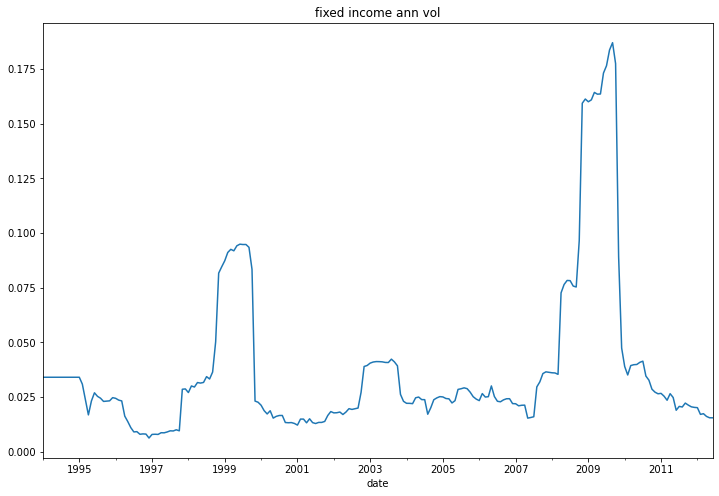

In [430]:
std['Fx Inc Arb Hedge Fund USD'].plot(figsize=(12,8))
plt.title('fixed income ann vol')
plt.ylabel=('vol')
plt.show();

In [431]:
std

,Ln/Sh Eq Hedge Fund USD,Eq Mkt Ntr Hedge Fund USD,Ded Sh Bs Hedge Fund USD,Global Mac Hedge Fund USD,Mngd Fut Hedge Fund USD,Emg Mkts Hedge Fund USD,Evnt Drvn Hedge Fund USD,Cnvrt Arb Hedge Fund USD,Fx Inc Arb Hedge Fund USD,DJCS Hedge Fund USD
date,,,,,,,,,,
1994-01-31,0.063729,0.023904,0.121047,0.093959,0.056643,0.244740,0.046710,0.033497,0.034054,0.071603
1994-02-28,0.063729,0.023904,0.121047,0.093959,0.056643,0.244740,0.046710,0.033497,0.034054,0.071603
1994-03-31,0.063729,0.023904,0.121047,0.093959,0.056643,0.244740,0.046710,0.033497,0.034054,0.071603
1994-04-29,0.063729,0.023904,0.121047,0.093959,0.056643,0.244740,0.046710,0.033497,0.034054,0.071603
1994-05-31,0.063729,0.023904,0.121047,0.093959,0.056643,0.244740,0.046710,0.033497,0.034054,0.071603
...,...,...,...,...,...,...,...,...,...,...
2012-02-29,0.101889,0.054173,0.182203,0.040854,0.112988,0.112016,0.089952,0.050253,0.017087,0.060013
2012-03-30,0.104297,0.055238,0.185086,0.040393,0.110157,0.116276,0.090348,0.044936,0.017403,0.060681
2012-04-30,0.104438,0.054703,0.184745,0.041557,0.110646,0.114238,0.091469,0.044615,0.016163,0.060666


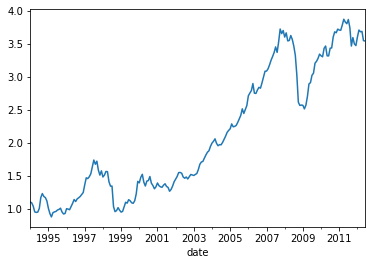

In [440]:
cum_rets =  (rets+1).cumprod()
cum_rets['Emg Mkts Hedge Fund USD'].plot();

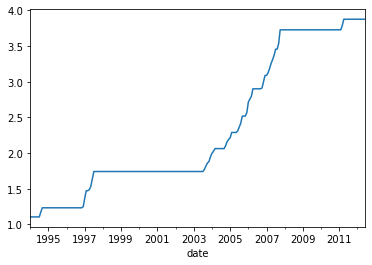

In [442]:
hwm=cum_rets['Emg Mkts Hedge Fund USD'].expanding().max()
hwm.plot();

In [463]:
dd = (hwm - cum_rets['Emg Mkts Hedge Fund USD'])/hwm
dd

date
1994-01-31    0.000000
1994-02-28    0.011705
1994-03-31    0.057392
1994-04-29    0.136262
1994-05-31    0.142700
                ...   
2012-02-29    0.042333
2012-03-30    0.049048
2012-04-30    0.047629
2012-05-31    0.083713
2012-06-29    0.084955
Name: Emg Mkts Hedge Fund USD, Length: 222, dtype: float64

In [494]:
madd = 0.3
weights = []
for i in range(len(madd-dd)):
    if madd-dd[i]>=3*std['Emg Mkts Hedge Fund USD'][i]:
        x=1
    else:
        x = (madd-dd[i])/(3*std['Emg Mkts Hedge Fund USD'][i])
    weights.append(x)

In [508]:
ret2 = rets['Emg Mkts Hedge Fund USD']*weights + 1
hwm2 = (ret2.cumprod()).expanding().max()
dd2 = (hwm2 - ret2.cumprod()) / hwm2
dd2

date
1994-01-31    0.000000
1994-02-28    0.004596
1994-03-31    0.019801
1994-04-29    0.038091
1994-05-31    0.039627
                ...   
2012-02-29    0.045866
2012-03-30    0.050679
2012-04-30    0.049636
2012-05-31    0.073008
2012-06-29    0.073783
Name: Emg Mkts Hedge Fund USD, Length: 222, dtype: float64

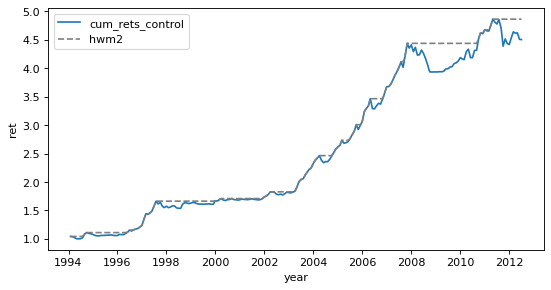

In [503]:
fig, ax1 = plt.subplots(figsize=(8,4),dpi=80)
ax1.plot(ret2.cumprod(),label='cum_rets_control')
ax1.plot(hwm2,color='grey',ls='--',label='hwm2')
ax1.set_xlabel('year')
ax1.set_ylabel('ret')
ax1.legend(loc='upper left');

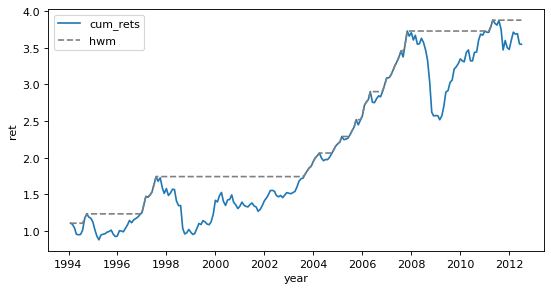

In [504]:
fig, ax1 = plt.subplots(figsize=(8,4),dpi=80)
ax1.plot(cum_rets['Emg Mkts Hedge Fund USD'],label='cum_rets')
ax1.plot(hwm,color='grey',ls='--',label='hwm')
ax1.set_xlabel('year')
ax1.set_ylabel('ret')
ax1.legend(loc='upper left');

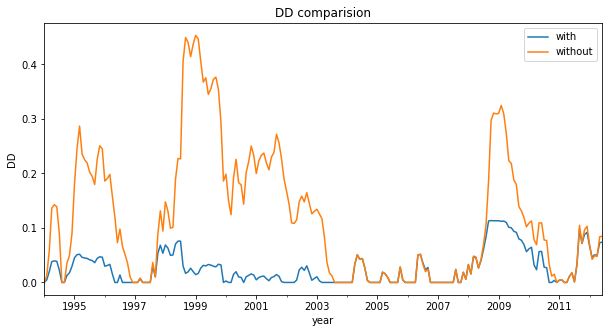

In [521]:
pd.DataFrame(data=[dd2,dd],index=['with','without']).T.plot(title='DD comparision',figsize=(10,5),
                                                           ylabel='DD',xlabel='year');

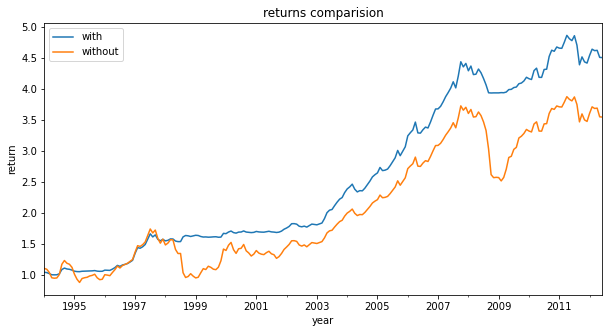

In [523]:
pd.DataFrame(data=[ret2.cumprod(),cum_rets['Emg Mkts Hedge Fund USD']],
             index=['with','without']).T.plot(title='returns comparision',
                                              figsize=(10,5),
                                             ylabel='return',xlabel='year');

In [546]:
sr = find_sr(rets[['Emg Mkts Hedge Fund USD']])[0]
ar = (rets['Emg Mkts Hedge Fund USD'].mean())*12
mdd = dd.max()
x = pd.DataFrame(data=[sr,ar,mdd],index=['SR','Average R','Max DD'])
x.columns=['']
x.T

,SR,Average R,Max DD
,0.537104,0.079873,0.453265


In [568]:
sr2 = find_sr((rets['Emg Mkts Hedge Fund USD']*weights))
ar2 = (rets['Emg Mkts Hedge Fund USD']*weights).mean()*12
mdd2 = dd2.max()
y = pd.DataFrame(data=[sr2,ar2,mdd2],index=['SR_with','Average R_with','Max DD_with'])
y.columns=['']
y.T

,SR_with,Average R_with,Max DD_with
,1.171819,0.084188,0.113529


In [597]:
ssr={}
hwm={}
dd = {}
mdd={}
ar = {}
for ind in rets.columns:
    sr=find_sr(rets[ind]-factors['RF'])
    ssr.update({ind:sr})
    h=(rets[ind]+1).cumprod().expanding().max()
    hwm.update({ind:h})
    d= (h - ((rets[ind]+1).cumprod()))/h
    dd.update({ind:d})  
    md = d.max()
    mdd.update({ind:md})
    a=(rets[ind].mean())*12
    ar.update({ind:a})

In [599]:
pd.DataFrame(data=[ar,mdd,ssr],index=['Ave_ret','Max_dd','Sharp_ratio'])

,Ln/Sh Eq Hedge Fund USD,Eq Mkt Ntr Hedge Fund USD,Ded Sh Bs Hedge Fund USD,Global Mac Hedge Fund USD,Mngd Fut Hedge Fund USD,Emg Mkts Hedge Fund USD,Evnt Drvn Hedge Fund USD,Cnvrt Arb Hedge Fund USD,Fx Inc Arb Hedge Fund USD,DJCS Hedge Fund USD
Ave_ret,0.090426,0.052920,-0.026606,0.115129,0.061293,0.079873,0.088325,0.073543,0.052390,0.084131
Max_dd,0.221405,0.451340,0.642425,0.270007,0.178773,0.453265,0.192981,0.329975,0.290999,0.198180
Sharp_ratio,0.605815,0.220059,-0.336170,0.878311,0.263863,0.331944,0.920016,0.624601,0.383172,0.715891


In [624]:
ssr2={}
hwm2={}
dd2 = {}
mdd2={}
ar2 = {}
for i in range(rets.shape[1]):
    ind=rets.columns
    sr2=find_sr((rets.iloc[:,i]*weights-factors['RF']))
    ssr2.update({ind[i]:sr2})
    h2=(rets.iloc[:,i]*weights+1).cumprod().expanding().max()
    hwm2.update({ind[i]:h2})
    d2 = (h2 - ((rets.iloc[:,i]*weights+1).cumprod()))/h2
    dd.update({ind[i]:d2})  
    md2 = d2.max()
    mdd2.update({ind[i]:md2})
    a2=((rets.iloc[:,i]*weights).mean())*12
    ar2.update({ind[i]:a2})

In [626]:
pd.DataFrame(data=[ar2,mdd2,ssr2],index=['Ave_ret_with','Max_dd_with','Sharp_ratio_with'])

,Ln/Sh Eq Hedge Fund USD,Eq Mkt Ntr Hedge Fund USD,Ded Sh Bs Hedge Fund USD,Global Mac Hedge Fund USD,Mngd Fut Hedge Fund USD,Emg Mkts Hedge Fund USD,Evnt Drvn Hedge Fund USD,Cnvrt Arb Hedge Fund USD,Fx Inc Arb Hedge Fund USD,DJCS Hedge Fund USD
Ave_ret_with,0.052336,0.039643,-0.028149,0.080399,0.035704,0.084188,0.058566,0.036448,0.035183,0.057691
Max_dd_with,0.121564,0.043249,0.535752,0.052429,0.139467,0.113529,0.128495,0.133154,0.074420,0.066658
Sharp_ratio_with,0.396690,0.338776,-0.562727,0.983001,0.064416,0.748486,0.692923,0.174077,0.174196,0.654315
